## pyΔ.next

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn     # sieht halt besser aus
import delta

/home/tv/.virtualenvs/Topics/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/tv/.virtualenvs/Topics/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
KMedoids clustering not available.
You need a patched scikit-learn, see README.txt
Traceback (most recent call last):
  File "/home/tv/git/pydelta.2015/delta/cluster.py", line 235, in <module>
    from sklearn.cluster import KMedoids
ImportError: cannot import name 'KMedoids'


## 1. Corpus vorbereiten

In [2]:
whole_corpus = delta.Corpus("test/corpus3/")
corpus = whole_corpus.top_n(2500)

### 2. Corpus → Distanzmatrix

In [3]:
distances = delta.functions.cosine_delta(corpus)
distances

,"Fontane,-Theodor_Der-Stechlin","Fontane,-Theodor_Effi-Briest","Fontane,-Theodor_Frau-Jenny-Treibel","Marlitt,-Eugenie_Das-Geheimnis-der-alten-Mamsell","Marlitt,-Eugenie_Das-Heideprinzesschen","Marlitt,-Eugenie_Die-Frau-mit-den-Karfunkelsteinen","Raabe,-Wilhelm_Die-Chronik-der-Sperlingsgasse","Raabe,-Wilhelm_Im-alten-Eisen","Raabe,-Wilhelm_Stopfkuchen"
"Fontane,-Theodor_Der-Stechlin",0.000000,0.640157,1.017926,1.331243,1.119296,1.257329,1.402441,1.343237,1.246155
"Fontane,-Theodor_Effi-Briest",0.640157,0.000000,0.897811,1.304392,1.215294,1.260774,1.280661,1.258676,1.209208
"Fontane,-Theodor_Frau-Jenny-Treibel",1.017926,0.897811,0.000000,1.267795,1.506644,1.354223,0.837908,0.886441,0.909698
"Marlitt,-Eugenie_Das-Geheimnis-der-alten-Mamsell",1.331243,1.304392,1.267795,0.000000,0.725335,0.801244,1.133478,1.200938,1.268060
"Marlitt,-Eugenie_Das-Heideprinzesschen",1.119296,1.215294,1.506644,0.725335,0.000000,0.722380,1.329303,1.395609,1.387786
"Marlitt,-Eugenie_Die-Frau-mit-den-Karfunkelsteinen",1.257329,1.260774,1.354223,0.801244,0.722380,0.000000,1.203421,1.215720,1.247171
"Raabe,-Wilhelm_Die-Chronik-der-Sperlingsgasse",1.402441,1.280661,0.837908,1.133478,1.329303,1.203421,0.000000,0.732207,0.793546
"Raabe,-Wilhelm_Im-alten-Eisen",1.343237,1.258676,0.886441,1.200938,1.395609,1.215720,0.732207,0.000000,0.624532
"Raabe,-Wilhelm_Stopfkuchen",1.246155,1.209208,0.909698,1.268060,1.387786,1.247171,0.793546,0.624532,0.000000


In [4]:
distances.simple_score()

1.8519760450855456

In [5]:
distances.metadata

Metadata(complete=False, corpus='test/corpus3/', delta='cosine_delta', delta_descriptor='cosine-z_score', delta_title='Cosine Delta', features='words', frequencies=False, lower_case=False, normalization=('z_score', 'z_score'), ordered=True, words=2500)

### Nun ein hierarchisches Clustering

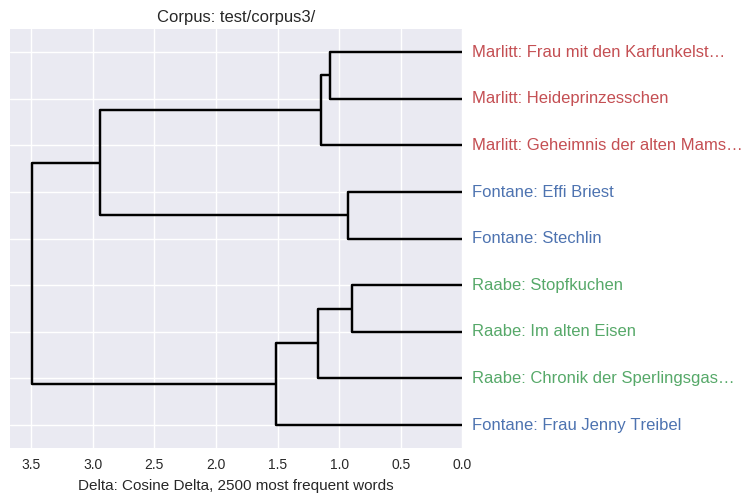

In [6]:
hclust = delta.Clustering(distances)
delta.Dendrogram(hclust).show()

### Flachklopfen

In [7]:
fclust = hclust.fclustering()
print(fclust.describe())
print(fclust.evaluate())

3 clusters of 9 documents (ground truth: 3 groups):
{1: ['Fontane: Frau Jenny Treibel', 'Raabe: Chronik der Sperlingsgas…',
     'Raabe: Im alten Eisen', 'Raabe: Stopfkuchen'],
 2: ['Fontane: Stechlin', 'Fontane: Effi Briest'],
 3: ['Marlitt: Geheimnis der alten Mams…', 'Marlitt: Heideprinzesschen',
     'Marlitt: Frau mit den Karfunkelst…']}

Cluster Errors         1.000000
Adjusted Rand Index    0.642857
Homogeneity            0.772507
Completeness           0.800000
V Measure              0.786013
Purity                 0.888889
Entropy                0.227493
dtype: float64


### Deltafunktionen

Cosine Delta kann jeder. Was gibts denn sonst so?

In [8]:
print(delta.functions)


        16 Delta Functions:
        ------------------
        cosine_delta (Cosine Delta) = cosine-z_score
cosine (Cosine Distance)
quadratic (Quadratic Delta) = sqeuclidean-z_score
eder_simple (Eder's Simple) = manhattan-sqrt
_classic_delta = burrows2
eder (Eder's Delta) = manhattan-z_score-eder_std
canberra (Canberra Distance)
burrows (Burrows' Delta) = manhattan-z_score
braycurtis (Bray-Curtis Distance)
manhattan (Manhattan Distance)
chebyshev (Chebyshev Distance)
distance = linear2
euclidean (Euclidean Distance)
Linear Delta = linear
sqeuclidean (Squared Euclidean Distance)
correlation (Correlation Distance)

        6 Normalizations:
        -----------------
        diversity_scaled
length_normalized
binarize
eder_std
sqrt
z_score (Z-Score)
        


Da fehlt Everts Ternarisierung! Erstmal eine Normalisierungsfunktion schreiben:

In [9]:
@delta.normalization
def ternarize(z):    
    result = pd.DataFrame(np.zeros_like(z), index=z.index, columns=z.columns)
    result[z < -2/3] = -1
    result[z > +2/3] = +1
    return result

Nun in eine Deltafunktion einbauen.

In [10]:
delta.deltas.CompositeDeltaFunction(descriptor="euclidean-z_score-ternarize", name="ternarized_delta", title="Ternarized Delta")
#  heute schrübe ich das nicht mehr so -----------´

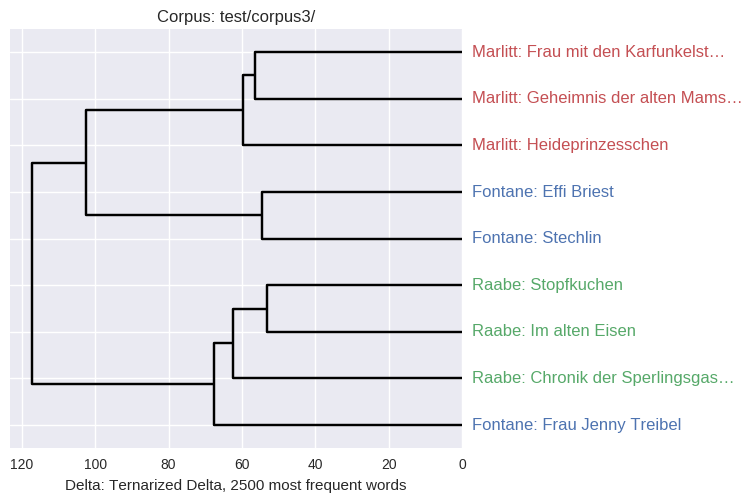

In [11]:
distances_t = delta.functions.ternarized_delta(corpus)
hclust_t = delta.Clustering(distances_t)
delta.Dendrogram(hclust_t).show()

In [12]:
print(distances_t.evaluate())

F-Ratio          0.389302
Fisher's LD     19.494347
Simple Score     1.784925
dtype: float64


In [13]:
distances_t.metadata

Metadata(complete=False, corpus='test/corpus3/', delta='ternarized_delta', delta_descriptor='euclidean-z_score-ternarize', delta_title='Ternarized Delta', features='words', frequencies=False, lower_case=False, normalization=('z_score', 'ternarize', 'z_score', 'ternarize'), ordered=True, words=2500)

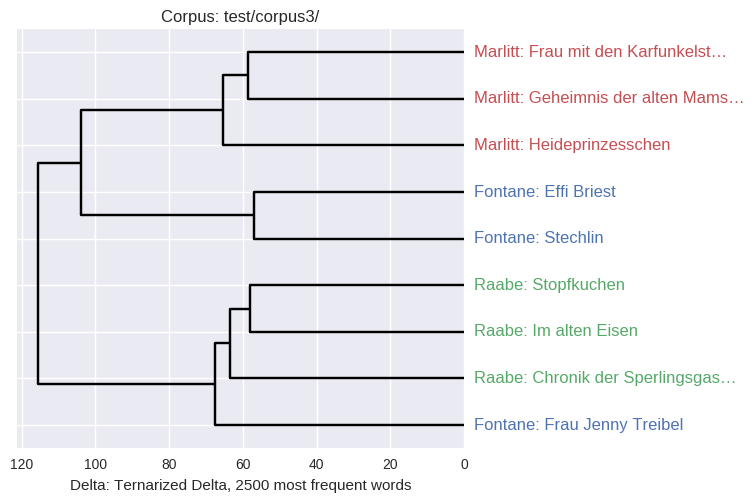

In [16]:
ncorpus = delta.Corpus('test/corpus3/', feature_generator=delta.FeatureGenerator(lower_case=True, ngrams=2))
delta.Dendrogram(delta.Clustering(delta.functions.ternarized_delta(ncorpus.top_n(2500)))).show()